# PyTorch练习1

In [1]:
#请输出你的姓名
print('赵旭阳')

赵旭阳


## 使用tensor编写并训练一个感知器模型

In [9]:
import torch
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

print(torch.__version__)

1.9.0


In [3]:
#生成训练数据
def GenerateSamples(n):
    x1 = torch.randn((2,n)) + 2
    x2 = torch.randn((2,n)) - 2
    y1 = torch.ones((n))
    y2 = torch.zeros((n))
    x = torch.cat((x1,x2),dim = 1)
    y = torch.cat((y1,y2),dim = 0)
    
    return x,y

torch.Size([2, 60])


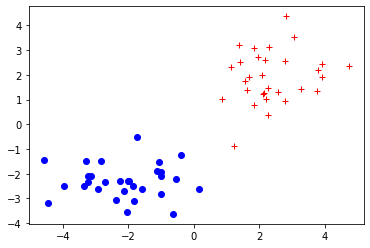

In [10]:
X,Y = GenerateSamples(30)
print(X.shape)
plt.plot(X[0,Y==1],X[1,Y==1],'r+')
plt.plot(X[0,Y==0],X[1,Y==0],'bo')

In [6]:
#编写模型并训练
class Neuron():
    def __init__(self, in_features):
        self.dim = in_features
        self.W = torch.zeros((1, self.dim))
        self.b = torch.zeros(1)
        
    def __sigmoid__(self, z):
        return 1 / (1 + torch.exp(-z))
    
    def __transfer__(self, x):
        return self.W @ x + self.b
    
    def __update__(self, dW, db, lr):
        self.W = self.W + lr * dW
        self.b = self.b + lr * db
        
    def __calc_loss__(self, Y, rho):
        # 分类问题的损失函数
        loss = -torch.log(rho[Y == 1]).sum() - torch.log(1 - rho[Y == 0]).sum()
        loss = loss / Y.shape[0]
        return loss
    
    def __backward__(self, Y, rho):
        err = Y - rho
        dW = err @ X.T / Y.shape[0]
        db = err.mean()
        return dW,db
    
    def predict(self, x):
        z = self.__transfer__(x)
        rho = self.__sigmoid__(z)
        return rho
    
    def fit(self, X, Y, max_iter = 100, lr = 0.1):
        n = X.shape[1]
        assert(X.shape[0] == self.dim)
        assert(n == Y.shape[0])
        
        for iter in range(max_iter):
            rho = self.predict(X).squeeze()
            loss = self.__calc_loss__(Y, rho)
            print('iter=',iter,',loss=',loss.item())
            dW,db = self.__backward__(Y, rho)
            self.__update__(dW, db, lr)
        
        

iter= 0 ,loss= 0.6931470632553101
iter= 1 ,loss= 0.02777140587568283
iter= 2 ,loss= 0.02610558085143566
iter= 3 ,loss= 0.024690182879567146
iter= 4 ,loss= 0.02346869371831417
iter= 5 ,loss= 0.02240084484219551
iter= 6 ,loss= 0.021457098424434662
iter= 7 ,loss= 0.020615214481949806
iter= 8 ,loss= 0.019858134910464287
iter= 9 ,loss= 0.019172513857483864
iter= 10 ,loss= 0.018547773361206055
iter= 11 ,loss= 0.01797536201775074
iter= 12 ,loss= 0.017448345199227333
iter= 13 ,loss= 0.016961002722382545
iter= 14 ,loss= 0.016508525237441063
iter= 15 ,loss= 0.016086949035525322
iter= 16 ,loss= 0.01569286920130253
iter= 17 ,loss= 0.015323380939662457
iter= 18 ,loss= 0.014976033940911293
iter= 19 ,loss= 0.014648647047579288
iter= 20 ,loss= 0.014339389279484749
iter= 21 ,loss= 0.014046603813767433
iter= 22 ,loss= 0.013768873177468777
iter= 23 ,loss= 0.013504943810403347
iter= 24 ,loss= 0.013253687880933285
iter= 25 ,loss= 0.013014113530516624
iter= 26 ,loss= 0.012785330414772034
iter= 27 ,loss= 0.0

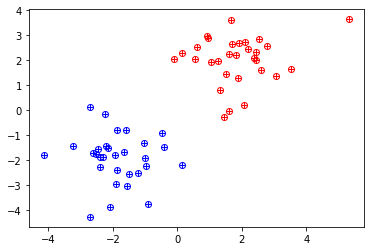

In [12]:
#测试模型
cell = Neuron(2)
cell.fit(X, Y, 100, 1)

X_test,Y_test = GenerateSamples(30)
Y_hat = torch.where(cell.predict(X_test).squeeze()>0.5,1,0)

plt.plot(X_test[0,Y_test==1],X_test[1,Y_test==1],'r+')
plt.plot(X_test[0,Y_test==0],X_test[1,Y_test==0],'b+')
plt.plot(X_test[0,Y_hat==1],X_test[1,Y_hat==1],'ro',fillstyle='none')
plt.plot(X_test[0,Y_hat==0],X_test[1,Y_hat==0],'bo',fillstyle='none')

acc = torch.mean((Y_hat==Y_test).to(torch.float32)).item()
print('Test Acc = ',acc)